# IBM Data Science professional certificate Capstone project

<h3 align="center">Iván Megía</h3> 

<h3 align="center">September 23, 2020</h3> 

# 1. Introduction/Business problem

The aim of this report is to deal with the prediction of the severity of car accidents by creating a Machine Learning algorithm. Car accidents are a very serious social problems nowadays and it is important for all the society to be conscious and commited to this problem.

Each time there is an accident, the local authorities take note of every detail related to that accident, and this data is stored in a database. As the local authorities have been doing so for lots of years, there is a lot of information available giving us all the details of each registered accident of previous years. By using the Machine Learning algorithms and the data available, we could predict the severity of an accident once it has been produced, and we could warn with that prediction to the medical services and the local authorities in order to be more prepared to recieve the injured people, as they will have the prediction of the severity of the accident.

We could also use this Machine Learning algorithm in order to warn the driver of the severity of the accident that he could be involved in given the information of the weather, speed, road condition, etc. This alert could raise on awareness in all the drivers and could drastically reduce the number of accidents.

# 2. Data

In this section we will describe the data we will be using in order to create the Machine Learning  algorithm that will predict the severity of the accidents.

We have obtain all the data from a government site about information on Data Collisions over the past years. We can see an overviwe of the mentiones data on the below.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


There are 194,763 data entries in this database, but there are a lot of missing data and there is a lot of responses without the correct format. This is an important fact and we will ned to clean and prepare de data in order to be analysed. After removingall the missing data and the data without the expected format, we have 189,522 valid data entries. We have removed 5,151 data entries in total, this could seem a lot of removed data, but we still have ample data available to build the Machine Learning algorithm.

Here we can see the data format before the data cleaning:

In [93]:
df.shape

(194673, 38)

Here we can see the data format after the data cleaning:

In [94]:
df.dropna(subset=['WEATHER'],axis=0,inplace=True)
df.dropna(subset=['COLLISIONTYPE'],axis=0,inplace=True)
df.dropna(subset=['ROADCOND'],axis=0,inplace=True)
df.dropna(subset=['VEHCOUNT'],axis=0,inplace=True)
df.dropna(subset=['PERSONCOUNT'],axis=0,inplace=True)
df.shape

(189522, 38)

The next step, and probably the most important one in order to build the Machine Learning algorithm is select the correct variables in order to predict if and accident is or not severe.

## Percentage of accidents depending on the collision type

In the chart shown below we can see there is an important difference in the severity of the accident depending on the collision type. The collision type gives us information on whether the accident is more severe if a pedestrian is involver or not for example. This chart has shown that the collision type is a variable which has influence on the severity of the accident and we will have to take it into account.

A codification has been used in order to simplyfy the data in such a way that **1 - Proper Damage** and **2 - Injury**.

As we see, there is a correlation between the road condition and the type and severity of the accidents.

Text(0, 0.5, 'Percentage')

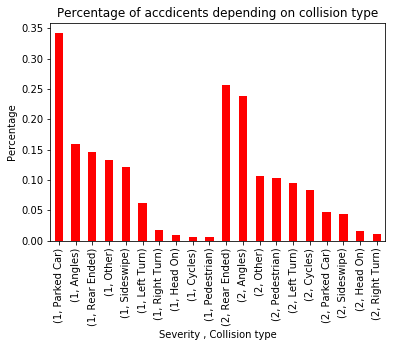

In [95]:
#Number of accidents for collision type
df.groupby(['SEVERITYCODE'])['COLLISIONTYPE'].value_counts(normalize=True).plot(kind='bar',color='red')
plt.title('Percentage of accdicents depending on collision type')
plt.xlabel('Severity , Collision type')
plt.ylabel('Percentage')

## Percentage of accidents depending on the road condition

This chart gives us information on whether the road condition has or not an impact on the severity of accidents. We can see that, for dry road 10% of the acidents are likely to be more severe and cause worse injuries, so this will be another variable we will take into account in our study.

Text(0, 0.5, 'Percentage')

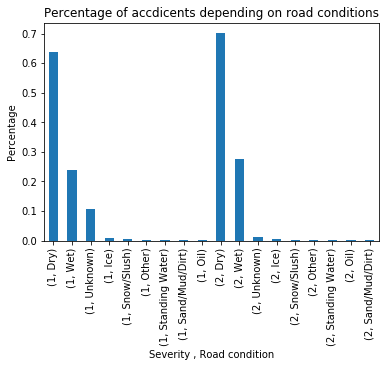

In [96]:
#Percentage of accidents for each road condition
df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage of accdicents depending on road conditions')
plt.xlabel('Severity , Road condition')
plt.ylabel('Percentage')

## Percentage of accidents depending on the weather

The chart shown below gives us information on the percentaje of accidents given a particula weather condition. We can see that if it rains, the percentaje of severe accients is higher, so we will use the weather variable in order to build our algorithm.

Text(0, 0.5, 'Percentage')

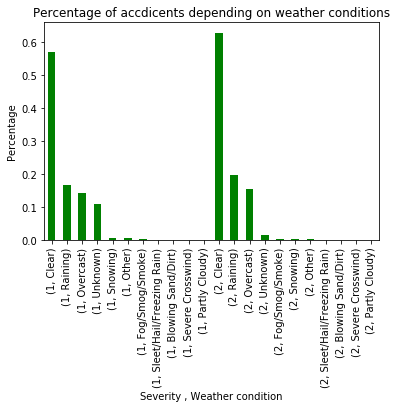

In [97]:
#Number of accidents for each weather
df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True).plot(kind='bar',color='green')
plt.title('Percentage of accdicents depending on weather conditions')
plt.xlabel('Severity , Weather condition')
plt.ylabel('Percentage')

## Percentage of accidents depending on the number of pedestrians involved

This plots shows the severity of accidents does not vary very much depending on the number of pedestrians involved, in fact, most of the accidents occur withot a pedestrian involved, so we will not take this variable into account.

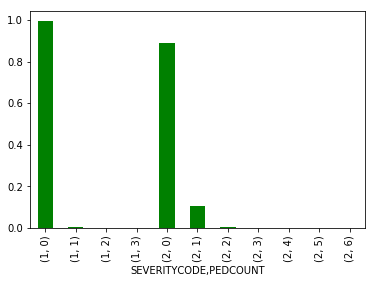

In [98]:
df.groupby(['SEVERITYCODE'])['PEDCOUNT'].value_counts(normalize=True).plot(kind='bar',color='green')

## Percentage of accidents depending on the number of pedestrians involved

The chart below shows that the accident is less severe if only one vehicle is involved in it, so we will use this variable to build the algorithm.

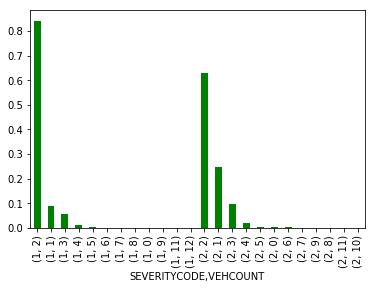

In [99]:
df.groupby(['SEVERITYCODE'])['VEHCOUNT'].value_counts(normalize=True).plot(kind='bar',color='green')

## Percentage of accidents depending on the number of people involved

This chart shows that most parts of the accidents are not severe if one or more people is involved in the accident.

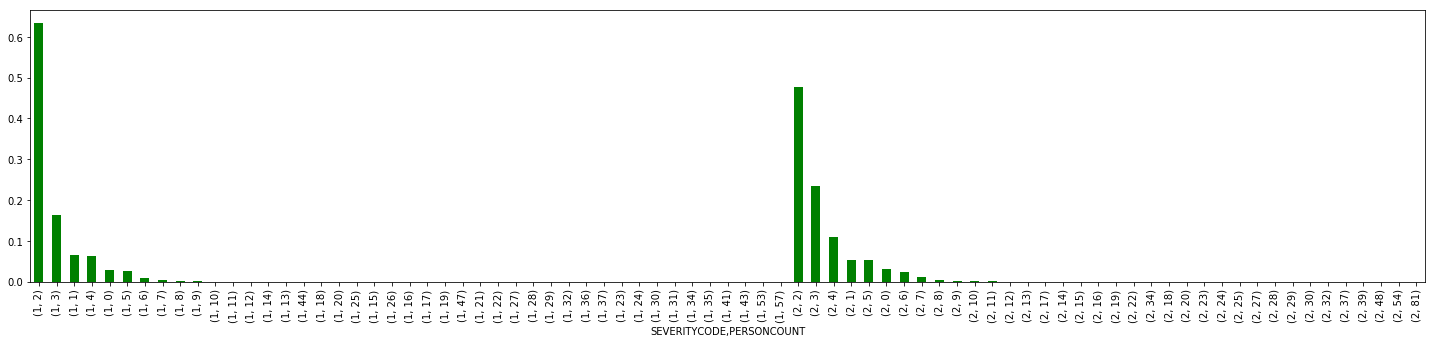

In [100]:
df.groupby(['SEVERITYCODE'])['PERSONCOUNT'].value_counts(normalize=True).plot(kind='bar',color='green', figsize=(25,5))

We see the number of people involved has an impact on the severity of the accident

## Percentage of accidents depending on the number of cyclists involved

We can see that most of the accidents, independently if they are more or less severe, take place without cyclists involved, so this variable will not be taken into account.

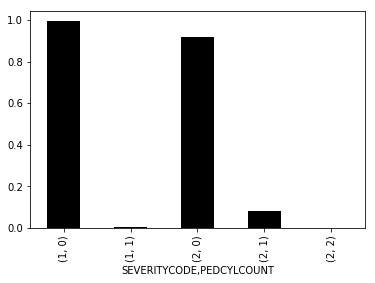

In [101]:
df.groupby(['SEVERITYCODE'])['PEDCYLCOUNT'].value_counts(normalize=True).plot(kind='bar',color='black')

## Number of accidents where the speed was involved

As we can see below, there is a lot of missing data on this variable. We only have 9,323 entries on weather the speed was the cause of the accident or no, and it is not possible to fill the data, so this varaible well not be taken into account.

In [103]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9323


## Conclusion

After cleaning the data, we have seen the influence of each variable on the severity of the accidents in order to decide what variables ara important in order to build the Machine Learning algorithm. In the following chart only the five first rows of the selected variables is shown.

In [104]:
df_filtered=df[['COLLISIONTYPE','WEATHER','ROADCOND','VEHCOUNT','PERSONCOUNT']]
df_filtered.head()

,COLLISIONTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT
0,Angles,Overcast,Wet,2,2
1,Sideswipe,Raining,Wet,2,2
2,Parked Car,Overcast,Dry,3,4
3,Other,Clear,Dry,3,3
4,Angles,Raining,Wet,2,2


In addition it is important to note that in order to build a Machine Learning algorithm, all categorical variables should be transformed into numerical variables using a codification. An example of this is shown on the chart below for the mentioned variable:

In [105]:
df_filtered['COLLISIONTYPE'].replace(to_replace=['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'],value=[1,2,3,4,5,6,7,8,9,10],inplace=True)
df_filtered.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,COLLISIONTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT
0,2,Overcast,Wet,2,2
1,5,Raining,Wet,2,2
2,1,Overcast,Dry,3,4
3,4,Clear,Dry,3,3
4,2,Raining,Wet,2,2


In [106]:
df_filtered['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],value=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)
df_filtered.head()

,COLLISIONTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT
0,2,3,Wet,2,2
1,5,2,Wet,2,2
2,1,3,Dry,3,4
3,4,1,Dry,3,3
4,2,2,Wet,2,2


In [107]:
df_filtered['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'],value=[1,2,3,4,5,6,7,8,9],inplace=True)
df_filtered.head()

,COLLISIONTYPE,WEATHER,ROADCOND,VEHCOUNT,PERSONCOUNT
0,2,3,2,2,2
1,5,2,2,2,2
2,1,3,1,3,4
3,4,1,1,3,3
4,2,2,2,2,2


In [108]:
from sklearn import preprocessing
X=df_filtered
X= preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [109]:
y = df['SEVERITYCODE'].values

# 3. Methodology

Based on the data obtained in the Data section, we will implement the Machine Learning algorithm. This problem could be reduced to a problem of classification, as we need to clasify our accident as proper damage or injury, which are categorical values. In order to do this we will implement a Machine Learning algorithm for classification, for example the Logistic Regression.

Before implementing the Machine Laarning algorithm we will split our data set into a train dataset and a test data set, in order to train our model and see how it behaves when classifying new data. Both train and test set dimensions are shown below:

In [110]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151617, 5) (151617,)
Test set: (37905, 5) (37905,)


In [111]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [112]:
from sklearn.metrics import jaccard_similarity_score

# 4. Results

In this section we will comment the results obtained when, after training the model withthe train set, we predict the results of the test set and we compare them with the acutal values of the test set.

We could quantify the accurary of th prediction using the Jaccard Index. We can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0. The value of the jaccard index for this prediction is:

In [113]:
yhat_LR = LR.predict(X_test)
print('Jaccard for LR is:', jaccard_similarity_score(y_test, yhat_LR))

Jaccard for LR is: 0.7183485028360375


In [114]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_LR, labels=[1,2]))

[[24756  1590]
 [ 9086  2473]]


In order to have a visual evaluation of the results, the confusion matrix has been plotted as it is shown below:

Confusion matrix, without normalization
[[24756  1590]
 [ 9086  2473]]
              precision    recall  f1-score   support

           1       0.73      0.94      0.82     26346
           2       0.61      0.21      0.32     11559

   micro avg       0.72      0.72      0.72     37905
   macro avg       0.67      0.58      0.57     37905
weighted avg       0.69      0.72      0.67     37905



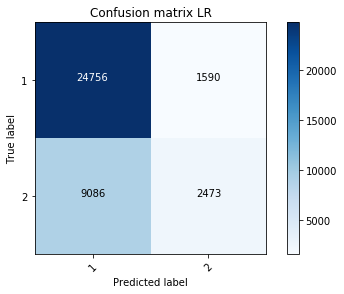

In [115]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix LR')
print (classification_report(y_test, yhat_LR))

The the first row in the confusion matrix shows the number of values in the test set whose actual value is 1. From 26,346 values in the test set with the value of 1, the algorithm predicted 24,756 as 1 and 1590 as 2.

The the first row in the confusion matrix shows the number of values in the test set whose actual value is 2. From 11,559 values in the test set with the value of 2, the algorithm predicted 9086 as 1 and 1590 as 2.

# 5. Discussion

After evaluating the results, it can be noted that, according to the jaccard index, our Machine Learning algorithm is able to predict with accuracy the 71% of the predictions, but, depending on the case this value could not be enough to trust this system.

The the first row in the confusion matrix shows the number of values in the test set whose actual value is 1. From 26,346 values in the test set with the value of 1, the algorithm predicted 24,756 as 1 and 1590 as 2.

The the second row in the confusion matrix shows the number of values in the test set whose actual value is 2. From 11,559 values in the test set with the value of 2, the algorithm predicted 9086 as 1 and 1590 as 2.

It can be noted that the algorithm is able to predict with much more accuray the Proper Damage (1) than the injuries (2). In orderto improve the predictions for the variable injury itis recommended to study if there is any other variable from the original dataset which may have more statistical inference on the variable injury. After doing so, the algorithm could be trained again in order see if this new independent variable helps the model to predict with better accuracy.

# 6. Conclusion

We have seen that the Machine Learning algorithms are very useful to predict accidents based on a previous recopilation of data. In this case, the machine learning model has given 71% of accuracy in the predictions. In order to implement the machine learning algorithm with high trustworthiness it is interesting to test the same data with different machine learning algorithms such as the KNN or the SVM in order to see if those algorithms behave better in this case.